# Python Workbook 2: What is the Difference by Year?

In previous workbook, we looked at how to bring in a dataset in a Pandas Data Frame and explore it. In this workbook, we'll explore more of how we can use Python to automate and speed up analysis. In addition, we'll look at using basic visualizations.

## <span style = "color:green">Motivating Question</span>

So far, we've only looked at data from 2015. However, part of what makes the LODES data so useful is the availability of the data over many years. The data are available in multiple CSV files. There are many insights we might find from analyzing data over years, so we want to be able to bring them all together. In this notebook, we'll explore how to do that as we try to answer the following questions:

**What is the difference in the number of jobs by age group and by year? What are the different trends across years?**

To answer these, we'll introduce you to creating Python functions to make reading datasets easier. Then, we'll use them within loops to automate reading in datasets. Finally, we'll show some basic visualizations with the data that we get to bring it all together.

## Starting Out
As before, we'll start by loading libraries. We have a few more commands we'll be running in the beginning since we're also going to be doing some visualizations.

In [14]:
# Start (as usual) by loading libraries
import numpy as np
import pandas as pd
import matplotlib as mplib
import matplotlib.pyplot as plt

# For inline graphics
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


Matplotlib is the new library here, giving us access to visualization tools that we'll use in the second half of this notebook. In addition, notice that we've included a line with `%matplotlib inline`. This is something called a **magic function**, and this magic function allows us to see plots "inline," or within the text of the Jupyter notebook. Don't worry too much about how it works -- just make sure to include it whenever you want to plot in Jupyter notebooks.

## Looking at Multiple Years

In the previous workbook, we looked at the 2015 dataset. We might want to look at multiple years to see what happens across years and the difference in industries by year. However, it can get quite tedious if we want to bring in the different csv files one by one. To speed up the whole process, we can use Python to automate the process of bringing in datasets and make the whole task much easier to manage.

In the following sections, we'll go over how to automate the downloading of the LODES files by creating functions and for loops. To set everything up, refer to page 2 in the LODES data documentation (you can access it [here](https://lehd.ces.census.gov/data/lodes/LODES7/LODESTechDoc7.3.pdf)). This describes the directory tree as well as explaining that the CSV files are compressed using a GZip algorithm. You don't need to worry too much about the details here, but we use this information in determining how exactly we'll automate the downloading process.

## <span style="color:green">Creating Functions (VIDEO)</span>

First, we start off by creating a function. You're familiar with functions in general already, since you've used them to do various things like determining the type of an object (by using `type()`) or finding the mean of a list of numbers (using `mean()`). Here, we'll walk through creating your own function. This helps simplify your code make it much more readable if you're going to be doing the same thing many times, as you won't have to copy and paste your code each time you want to do a certain task.

Let's start with a very basic function. Suppose we want a function that takes an argument and returns the squared value. 

In [ ]:
def squarer (x):
    y = x ** 2
    return(y) 

# Test it out
squarer(4)

Here, we're creating a function called `squarer` which takes an input, `x`, and outputs the squared value. Let's break it down line by line.

    def squarer (x):

The `def` indicates that we're defining a function, followed by what we want to name the function. Then, in parentheses, we put in any arguments we want the function to take. If we don't want it to take any arguments, we can just leave it blank. Lastly, we end the line with a colon. 

This takes us to the next lines. 

    y = x ** 2
    return(y) 
    
First, note that these lines are indented. In order to be a part of the function, the lines coming after `def` must be indented. Here, we have two lines, which assigns the value `x ** 2` (note that `**` is the operator for taking something to a power) to `y`, then uses the `return` function to output it. 

Lastly, we have unindented lines, which aren't part of the function.
    
    squarer(4)

This just uses the function with the argument `4` to see if it works and gives us a value of 16. 

### Creating a Function to Bring In Data

Let's now make a function called `get_ca_wac()` that takes the year as an argument and outputs the California workplace area characteristic dataset. We'll show the code, then explain it in detail.

In [2]:
def get_ca_wac(year):
    # year: the year we want to bring in data for
    
    file_name = 'https://lehd.ces.census.gov/data/lodes/LODES7/ca/wac/ca_wac_S000_JT00_{yr}.csv.gz'.format(yr = year)
    output = pd.read_csv(file_name,compression='gzip')
    return(output)

We need to change the location of the file depending what year we want to get. We do this by using the `format()` method on a string. Notice that in the string

    https://lehd.ces.census.gov/data/lodes/LODES7/ca/wac/ca_wac_S000_JT00_{yr}.csv.gz

we have a part with curly braces, `{yr}`. This is followed by an argument in `format()` of `yr = year`. This means that whenever we see `{yr}` in the string, we replace it with whatever is in `year`. This gives us the string we want. For example, if the year we want is 2015, the file is at `https://lehd.ces.census.gov/data/lodes/LODES7/ca/wac/ca_wac_S000_JT00_2015.csv.gz`.

In this function, we put the Data Frame that we want in `output`. The line

    output = pd.read_csv(file_name,compression='gzip')

should look relatively familiar to you, since we've used the `read_csv()` method before. In this case, we have to specify another argument, `compression = 'gzip'`, since the file is compressed and the LODES documentation tells us it was compressed using the GZip algorithm.

Finally, we use the `return()` statement to give the result of our function, which is the Data Frame that we put in `output`. 

Let's try using this function to get the dataset from 2015.

In [3]:
df_2015 = get_ca_wac(2015)

Now, we've shown the creation of a function for just the California Workplace Area Characteristics dataset. Let's say you actually want to bring in data for multiple states (perhaps even all the states). You could adjust the code above to reflect the correct state in the URL for each state, but that would take a very long time and a lot of tedious editing of code. How might we create a function to make such a task easier?

If you recall, we created a function so that we could easily change the year while keeping the rest of the code the same. In this case, we need to adjust our code so that it can take different states. Therefore, we can take the function we created above and make some slight adjustments so that we can specify the state as one of its arguments. 

Try thinking about how you might adjust the code above and compare it to what we have done below.

In [ ]:
def get_wac(year, state = "ca"):
    # state: string, two-letter code of state for which we want the data
    # year: int, the year we want to bring in data for
    
    base_url = 'https://lehd.ces.census.gov/data/lodes/LODES7/'
    file_specs = '{st}/wac/{st}_wac_S000_JT00_{yr}.csv.gz'.format(st = state, yr = year)
    file_name = base_url + file_specs
    
    # print("The URL for the file is at: " + file_name)
    output = pd.read_csv(file_name,compression='gzip')
    return(output)

First, notice that we now have two arguments that we can pass to the function: `year` and `state`. In addition, when defining the function, we've given `state` a default value of `"ca"` by using `state = "ca"`. This just means that, when calling `get_wac`, we can either give a value for `state`, or we can leave it blank, in which case it will default to `state = "ca"`.

Within the URL string, we need to replace all instances of `ca` and replace it with the string in `state`. I've separated the URL into two parts in order to make it easier to read. The first half, called `base_url`, doesn't change, so we can include that no matter the choice of state or year. The second half, called `file_specs`, needs state and year to be specified, which we do similar to how we did it before. We can use the `+` operator to combine to strings into one. 

Let's try using the function and do a quick check to see if it seems to be working correctly.

In [ ]:
df_2015 = get_wac(year = 2015, state = 'ca')
df_2015.head()

Here, I've specified `'ca'` at the state even though it's the default when we defined the function. This is just for clarity, and running the code without the `state = 'ca'` argument would do the exact same thing. 

> **Coding Tip:** Notice that there's a line that's been commented out near the bottom: "`# print("The URL for the file is at: " + file_name)`". Try uncommenting it (delete the "#"), run the cell defining the function, then use the function again. This prints out helpful information -- in this case, the URL that we've constructed -- as the function runs. Using `print()` functions in this way is very useful for debugging when your function isn't working the way you think it should. 

## <span style = "color:red">Checkpoint 1: Creating Functions</span>

Try using the functions above to bring in the data for your state. Do you need to make any changes to the functions? Why or why not?

Suppose you wanted to adjust the functions so that you can specify whether you want to bring in the Origin-Destination (od) dataset, the Residence Area Characteristics (rac), or the Workplace Area Characteristics (wac), instead of bringing in the wac dataset by default. How would you adjust the code? Try doing it yourself.

## <span style = "color:green">Using Loops (VIDEO)</span>

Sometimes, we want to run the same code many times over. In these case, we can use loops so that we don't have to copy and paste the code over and over. To demonstrate how loops work, we'll first look at a basic `for` loop.

In [ ]:
for i in range(0,10):
    print(i)

Here, we are looping through the numbers 0 to 9 and printing them out. Let's break down how each part works.

First, consider the first line.

    for i in range(0,10):

This indicates that we will be looping through the values of 0 to 9, incrementing `i` in each iteration. That is, the code will use `i=0` for one iteration. Then, it will go back and do everything again, except using `i=1`. This keeps going until it hits `i=9`, after which it stops. 

Notice that the second line is indented. In Python, we use the indentation to delineate when the loop starts and ends. Everything after the colon that is indented is part of the `for` loop. The `for` loop ends when a line isn't indented.

Consider the following code and think about what you expect it to print out before running it. 

In [ ]:
for i in range(0,10):
    print(i)
print("We're done now.")

Since the line with `print("We're done now.")` isn't indented, it isn't repeated. The `for` loop goes through the loop with just `print(i)`. 

## Using a For Loop to Read In CSV Files

Now that we've gone over the basics of how a for loop works, let's apply it to reading in multiple CSV files. We've already created a function that takes a year and reads a CSV file. We want to do this for multiple years automatically, so that we don't need to keep on changing the year and running the code again (if, for example, we want to do this for many years). So, in other words, we want to create a loop that runs the same code multiple times, with only the year changed.

Part of our task is a bit easier, since we've already created a function that does what we want. Now, all we need to do is loop through the years we want, calling that function with a different argument for the year.

### <span style="color:green">Using Python Dictionaries (VIDEO)</span>

There's one small complication though: how will we automate storage of these Data Frame objects? There's multiple possibilities, but the way we'll do it is using a Python **dictionary**. A **dictionary** is like a list, except it doesn't have an order in which **values** (which can be any Python object) are stored, and you access the elements of a dictionary using a **key**. Think of a dictionary like a bag of objects, from which we can find the object we want by using the appropriate label. In our case, we'll create a dictionary that has the year as the key and the Data Frame for that year as the value. This give us an easy way of both storing and accessing the Data Frames that we want to get. 

To create a dictionary, we can use curly braces, with colons separating key-value pairs. For example, we can create a dictionary called `example_dict` with three keys (`2009`, `"2010"`, `2011`) with some values. We can access the values we assigned to the keys using square brackets.

In [ ]:
# Creating a dictionary called example_dict
example_dict = {2009:5, "2010":2, 2011:None}

Our `example_dict` dictionary is storing three values: `5`, `2`, and `None`. The keys associated with these three values are `2009`, `"2010"`, and `2011`. Notice that `"2010"` is in quotes, indicating that it is a string, as opposed to `2009` or `2011`, which are integers. This is important, because we need to make sure to use the correct type to access the dictionary values. 

In [ ]:
# What do you think this will output?
example_dict[2009]

In [ ]:
# Since keys can be any type, we need to make sure to use the appropriate type
example_dict["2010"]

### <span style="color:green">Using Loops and Functions to Bring in Multiple Datasets  (VIDEO)</span>
We'll start by creating an empty dictionary in which we'll store the Data Frames that we read in. Then, we're going to loop through a few years (here, we'll do 2009 to 2015), calling the `get_wac` function we created earlier to store the appropriate dataset in the dictionary. We'll also make sure to provide the proper key when storing the dataset, so that we can easily access it. 

In [ ]:
# Initialize an empty dictionary.
wac_all_years = {}

# This loop might take a little bit of time.
# If you want to see progress while it runs, uncomment the second line in the loop.
for i in range(2009,2016):
    wac_all_years[i] = get_wac(year = i)
    # print("WAC for " + str(i) + " obtained.")

After running the loop, `wac_all_years` should contain seven Data Frames, each accessible using the year as the key.

Let's look at one of the years. 

In [ ]:
wac_all_years[2009].head(10)

Here, we're looking at the value in the dictionary `wac_all_years` that has the key `2009`, then using the `head()` method on that Data Frame object to take a peek at what the first few lines of the data looks like. 

If we wanted to work more extensively with one of the years (rather than just looking at it as we've done here), we might want to use something like

In [ ]:
wac_09 = wac_all_years[2009]

That way, we can just use `wac_09`.

## <span style="color:red">Checkpoint 2: Use Functions and Loops to Bring in Your Data for Multiple Years</span>

Using what we've learned above, try to apply the same methods to bring in multiple years' worth of data. Remember to name objects differently so that you don't overwrite anything.

## <span style = "color:green">Visualizations (VIDEO)</span>

Visualizations can help us look at summaries of the data. They can also aid in providing good presentation aids.

In this section, we'll look at a few basic types of visualizations: histograms, boxplots, lineplots. In practice, there are many more types of visualizations. Furthermore, there are many different packages that can help you create these different visualizations. While we'll focus only on the basics here with the `matplotlib` package, keep in mind that there are many tools available.

### Making a Histogram
We'll start with a basic histogram. A histogram is useful for looking at the distribution of a numerical variable (that is, a variable that takes numbers as its values as opposed to categories). They can visually represent the spread and center of the variable, as well as provide insights to the shape of the distribution. For example, we can look at the number of **modes**, or peaks, in the data, which wouldn't be captured in numerical summaries such as mean or variance. We can also get a better idea of the **skew** of the data, determining whether most units are grouped on the left or right side (lower or higher values), or whether it's mostly symmetrical. 

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
df_2015['C000'].plot(kind="hist", bins=20, range=[0,500])
ax.set_xlabel("Number of Jobs")

Let's break down each line of the code. First, we used the command 

`fig, ax = plt.subplots(figsize=(8,6))`.

This is where we intialize our plot, essentially setting up the space that we'll be working in. It creates a **Figure** object (`fig`) and an **Axes** object (`ax`). The Figure is the window in which we'll create our plot. In this case, we use the `figsize` argument to set the length and height to 8 and 6 inches, respectively. The Axes are the area around the figure, where the tick labels and titles are. 

Then, we plot the figure by taking the pandas Series and using the `plot()` method. We specify the number of bins at 20 (that is, how many rectangles we want in the plot), as well as a range for the x-axis. In this case, since there are some very high values that would stretch the graph out, we cut it off at 500.

### Making a Boxplot

A boxplot is also used for numerical data, and can be used in a similar manner to histograms in showing the distribution of the data. Instead of putting everything into bins, though, a boxplot plots the median, 25th percentile, and 75th percentile, along with outer limits and outliers. This makes for a simpler graph, and can be especially useful for comparing the distribution of multiple groups. However, unlike with histograms, you don't get any information about the number of modes.

The code for making a boxplot starts off very similar to that of making a histogram. We'll initialize the plot, then when using `plot()`, we'll use `kind="box"` instead of `kind="hist"`.

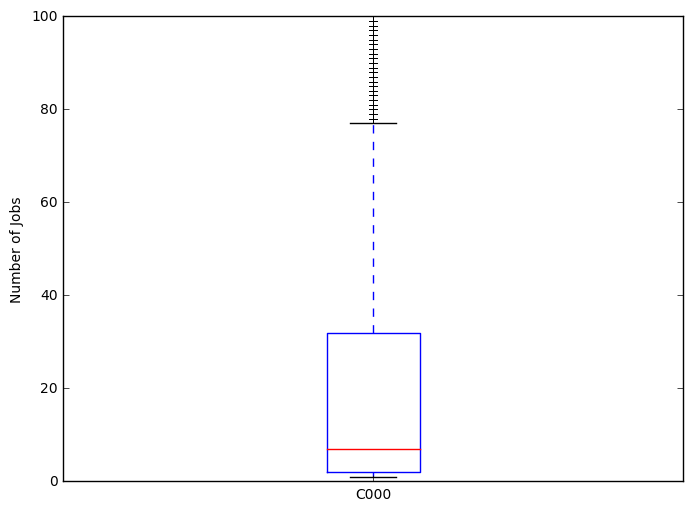

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
df_2015['C000'].plot(kind="box")
ax.set_ylim(0,100)
ax.set_ylabel("Number of Jobs")

Instead of setting `range=[0,100]` like we did before, we used the Axes method `set_ylim` to set the limits of the y-axis to be 0 and 100. Other than that, the code from before should look very familiar.

Let's now try making multiple boxplots to compare.

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
vars_to_plot = ['CA01','CA02','CA03']
df_2015[vars_to_plot].plot(kind="box", ax=ax)
ax.set_ylim(0,100)
ax.set_ylabel("Number of Jobs")

Here, we want multiple columns from the Data Frame, so instead of a Series object, we have a Data Frame object. Notice that we were able to select the proper columns from the Data Frame by using a List inside the square brackets. 

## <span style = "color:green">Using a Line Chart to Show Jobs by Year for Each Age Group (VIDEO)</span>

In this last section, we'll look at a line chart while incorporating all the other methods we've gone over in this notebook. Here, we want to look at the change in number of jobs by year, separating them into each age group so that we can look at the trends for each age group as well as compare the trends across age groups. 

In order to do this, we'll need to get that data from multiple Data Frames, since we want to combine data from multiple years. We'll put them all in lists, then bring it all together into one Data Frame, setting the index of that Data Frame to the correct year, then plot the line chart. Since we want to separate it by age group 

Recall that we've already brought in data from 2009 to 2015 already. We'll use that data for now, but you can go back and change the years to include more. We'll show all of the code, then go over the individual parts.

In [ ]:
# Initialize the lists we'll use to create Data Frame
ca_c000 = []
ca_ca01 = []
ca_ca02 = []
ca_ca03 = []

# Loop through all years and get total jobs by age group
for i in range(2009,2016):
    tempdf = wac_all_years[i]
    ca_c000.append(tempdf.C000.sum())
    ca_ca01.append(tempdf.CA01.sum())
    ca_ca02.append(tempdf.CA02.sum())
    ca_ca03.append(tempdf.CA03.sum())

# Create the overall Data Frame
plot_df = pd.DataFrame({"C000": ca_c000, "CA01": ca_ca01, 
                       "CA02": ca_ca02, "CA03": ca_ca03},
                       index=range(2009,2016))

# Now to plot
fig, ax = plt.subplots(figsize=(8,6))

# Add each plot
plot_df.C000.plot(kind='line', ax=ax, legend=True)
plot_df.CA01.plot(kind='line', ax=ax, legend=True)
plot_df.CA02.plot(kind='line', ax=ax, legend=True)
plot_df.CA03.plot(kind='line', ax=ax, legend=True)

# Just to make x-axis look nice
ax.get_xaxis().get_major_formatter().set_useOffset(False) 

We start by initializing four lists. These are the lists in which we'll store the total number of jobs for each age group by year. 

    ca_c000 = []
    ca_ca01 = []
    ca_ca02 = []
    ca_ca03 = []

The lists each correspond to an age group (or the total of all age groups), so we'll plot lines for four different categories: Total, 29 or younger, 30 to 54, and 55 or older. Next, we go through the loop.

    for i in range(2009,2016):
        tempdf = wac_all_years[i]
        ca_c000.append(tempdf.C000.sum())
        ca_ca01.append(tempdf.CA01.sum())
        ca_ca02.append(tempdf.CA02.sum())
        ca_ca03.append(tempdf.CA03.sum())

We're going to be looping through each year from 2009 to 2015. In each iteration, we start by storing the Data Frame for that year in `tempdf`. This step isn't absolutely necessary, as we could have chosen to replace each instance of "`tempdf`" with "`wac_all_years[i]`" in the rest of the loop, but I've done it to make the code more readable. Next, for each of the four categories, we'll take the appropriate column, calculate the `sum`, then `append` it to the appropriate list. This all takes place in one line for each category. 

    plot_df = pd.DataFrame({"C000": ca_c000, "CA01": ca_ca01, 
                           "CA02": ca_ca02, "CA03": ca_ca03},
                           index=range(2009,2016))

We then create a new Data Frame called `plot_df` that has a column for each age group and a row for each year. Notice that we create a dictionary with column names as keys and the lists containing the elements as the values. In addition, we specify the index to be the years. You can check the contents of `plot_df` to get a better idea of what we've constructed.

In [ ]:
plot_df

Lastly, we plot the figure using similar methods as before, except with `kind='line'`. 


    fig, ax = plt.subplots(figsize=(8,6))

    plot_df.C000.plot(kind='line', ax=ax, legend=True)
    plot_df.CA01.plot(kind='line', ax=ax, legend=True)
    plot_df.CA02.plot(kind='line', ax=ax, legend=True)
    plot_df.CA03.plot(kind='line', ax=ax, legend=True)
    
    ax.get_xaxis().get_major_formatter().set_useOffset(False) 

The last line is simply to make the years look nicer on the x-axis. You can try plotting without the last line (i.e. comment it out) to see what happens without it.  

### Saving Figures

Of course, some of the figures we make might help us visualize when exploring the data, but we might also want to save them to include in presentations or to show others without needing to run code. We can save the figure by using the `savefig()` method. Notice that we include the "`.jpg`" file extension in the name of the file. Here, we also specify a dpi. 

In [ ]:
fig.savefig('jobsbyage.jpg', dpi=600)

## <span style="color:red">Checkpoint 3: Visualize Your Data</span>

Try using the methods we've described above, try visualizing your data set. What do the visualizations tell you? How are they different from the data from California? How are they the same? Does this make sense?

##  <span style = "color:green">Error Messages and Documentation (VIDEO)</span>


We've discussed many basics for using Python for data analysis, but there is so much more that Python can do. It would be extremely difficult, even impossible, to memorize all of the different functions and remember how to do everything. Luckily, there is plenty of documentation available so that you can figure out what to do even if you don't remember it.

### Error Messages

Let's start by looking at error messages. The following code has intentionally been written incorrectly to produce an error message.

In [ ]:
error_msg_mean = np.mean(1,2,3)
print(error_msg_mean)

The important thing to look for in an error message is usually the last line. Here, we see "`tuple index out of range`". This is because `mean` doesn't take three arguments to find the mean of three numbers. In order to find this mean, we need to group them up in, for example, a list. 

In [15]:
correct_mean = np.mean([1,2,3])
print(correct_mean)

2.0


There might be times when you aren't able to figure out what went wrong based on the last line. In that case, your best bet is to copy and paste that line containing the error message into Google and see if there are any helpful hints online. One great resource is Stack Overflow, a website in which users submit questions to get help about coding. You'll most likely be able to find previous users who had the same issue you did, so you can simply find the appropriate thread and read what others have responded.

### Documentation

You can also get help by using the `help` function to look at the documentation. Let's pull up the documentation for `mean`. 

In [13]:
help(np.mean)

Help on function mean in module numpy.core.fromnumeric:

mean(a, axis=None, dtype=None, out=None, keepdims=False)
    Compute the arithmetic mean along the specified axis.
    
    Returns the average of the array elements.  The average is taken over
    the flattened array by default, otherwise over the specified axis.
    `float64` intermediate and return values are used for integer inputs.
    
    Parameters
    ----------
    a : array_like
        Array containing numbers whose mean is desired. If `a` is not an
        array, a conversion is attempted.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the means are computed. The default is to
        compute the mean of the flattened array.
    
        .. versionadded: 1.7.0
    
        If this is a tuple of ints, a mean is performed over multiple axes,
        instead of a single axis or all the axes as before.
    dtype : data-type, optional
        Type to use in computing the mean.  For inte

If this is a bit difficult to read (and it probably is because it's in the same document as everything else), you can also look up the documentation online. We can see here what the source of our error was, because the parameter we need to specify is `a`, which is an array, or array-like object. 

## <span style = "color:red">Checkpoint 4: Exploring Error Messages and Documentation </span>

Try looking at the documentation for various functions or objects we've gone over. This should help you get a better feel for how the documentation is structured, since you should have an idea what they're like already. Some possibilities include:
- Data Frames
- Pandas Series
- Lists
- Dictionaries

Is there a part of the documentation that doesn't make sense to you? Does seeing the documentation help you understand what you're working with better?